In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

import internal_ref as ref

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [35]:
CDC = ref.Home + '/df_final.csv'
labor = ref.Home + '/labor.csv'
hi = ref.Home + '/HI.csv'

df_CDC = pd.read_csv(CDC, dtype={'County Code' : int})
df_labor = pd.read_csv(labor, dtype={'series_id' : str, 
                                     'year' : int, 
                                     'period' : str, 
                                     'value' : object,
                                     'footnote_codes' : str,
                                     'area_code': str,
                                     'series_title' : str,
                                     'area_text' : str})
df_hi = pd.read_csv(hi)

/Users/allandong/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df_CDC.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Notes'], axis =1, inplace=True)

cdcColumns = ['County', 'County_Code', 'Race', 'Race_Code',
       'ICD_10_130_Infants',
       'ICD_10_130_Infants_Code', 'Cause_of_death',
       'Cause_of_death_Code', 'Gender', 'Gender_Code', 'Deaths', 'Births',
       'Death_Rate', 'Year']
df_CDC.columns = cdcColumns

In [37]:
df_labor_cty = df_labor[df_labor.area_code.str.find(r'CN') != -1]

In [38]:
df_labor_cty['FIPS'] = df_labor_cty['area_code'].map(lambda x: int(x[2:7]))
df_labor_cty_yr = df_labor_cty[df_labor_cty.period == 'M13']

/Users/allandong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_labor_HI = pd.merge(df_labor_cty_yr, df_hi, 
                       how='inner', 
                       left_on=['year', 'FIPS'], 
                       right_on=['Year', 'Id2'])

In [40]:
df = pd.merge(df_labor_HI, df_CDC,
             how='inner',
             left_on=['Year', 'FIPS'],
             right_on=['Year', 'County_Code'])

In [41]:
df.drop(['series_id', 'year', 'footnote_codes', 'area_code', 'series_title', 'area_text',
         'Id', 'Id2', 'Geography', 'County_Code'], axis=1, inplace=True)

In [42]:
df['Death_ratio']=df['Deaths']/df['Births']
df['HI_ratio'] = df['Est_1_HI_pop']/df['Est_total_pop']


In [122]:
df.unemployment_rate = df.unemployment_rate.apply(pd.to_numeric)

In [123]:
df1 = df.drop(['period', 'FIPS', 'Est_total_pop', 'Est_1_HI_pop',
       'Est_0_HI_pop', 'Race_Code',
       'ICD_10_130_Infants_Code', 
       'Cause_of_death_Code', 'Gender_Code', 'Deaths', 'Births',
       'Death_Rate'], axis=1)

In [124]:
df1.head()

,unemployment_rate,Year,HI_ratio,County,Race,ICD_10_130_Infants,Cause_of_death,Gender,Death_ratio
0,5.4,2008,0.112824,"Maricopa County, AZ",White,Certain conditions originating in the perinata...,Extreme immaturity,Female,0.000522
1,5.4,2008,0.112824,"Maricopa County, AZ",White,Certain conditions originating in the perinata...,Extreme immaturity,Male,0.000395
2,5.4,2008,0.112824,"Maricopa County, AZ",White,Disorders related to length of gestation and f...,Extreme immaturity,Female,0.000522
3,5.4,2008,0.112824,"Maricopa County, AZ",White,Disorders related to length of gestation and f...,Extreme immaturity,Male,0.000395
4,5.4,2008,0.112824,"Maricopa County, AZ",White,#Disorders related to short gestation and low ...,Extreme immaturity,Female,0.000522


# Initial Regression

In [125]:
df_county = patsy.dmatrix('County', data=df1, return_type='dataframe').drop('Intercept', 1)
df_race = patsy.dmatrix('Race', data=df1, return_type='dataframe').drop('Intercept', 1)
df_icd = patsy.dmatrix('ICD_10_130_Infants', data=df1, return_type='dataframe').drop('Intercept', 1)
df_cause = patsy.dmatrix('Cause_of_death', data=df1, return_type='dataframe').drop('Intercept', 1)
df_gender = patsy.dmatrix('Gender', data=df1, return_type='dataframe').drop('Intercept', 1)

In [126]:
df_lr = df1.drop(['County','Race','ICD_10_130_Infants', 'Cause_of_death','Gender'], axis=1)

In [127]:
df_lr1 = pd.concat([df_lr,
                   df_county,
                   df_race,
                   df_icd,
                   df_cause,
                   df_gender
                   ], axis=1, join='inner')

In [142]:
test

unemployment_rate  \
Year County                     Race                      Gender                      
2008 Baltimore city, MD         Black or African American Female                6.5   
                                                          Male                  6.5   
     Bexar County, TX           White                     Male                  4.6   
     Caddo Parish, LA           Black or African American Female                5.7   
     Cook County, IL            Black or African American Female                6.4   
                                                          Male                  6.4   
                                White                     Female                6.4   
                                                          Male                  6.4   
     Cuyahoga County, OH        Black or African American Female                6.2   
                                                          Male                  6.2   
     Dallas County, TX          Black or African American Male                  5.3   
                                White                     Female                5.3   
                                                          Male                  5.3   
     Duval County, FL           Black or African American Female                6.4   
     Fulton County, GA          Black or African American Male                  6.4   
     Harris County, TX          Black or African American Female                4.7   
                                                          Male                  4.7   
                                White                     Female                4.7   
                                                          Male                  4.7   
     Kings County, NY           Black or African American Female                6.0   
                                                          Male                  6.0   
     Los Angeles County, CA     Black or African American Male                  7.6   
                                White                     Female                7.6   
                                                          Male                  7.6   
     Maricopa County, AZ        White                     Female                5.4   
                                                          Male                  5.4   
     Philadelphia County, PA    Black or African American Female                7.1   
                                                          Male                  7.1   
                                White                     Male                  7.1   
     Prince George's County, MD Black or African American Male                  4.3   
...                                                                             ...   
2014 Baltimore city, MD         Black or African American Male                  8.5   
     Bexar County, TX           White                     Male                  4.7   
     Broward County, FL         Black or African American Female                5.9   
     Cook County, IL            Black or African American Female                7.5   
                                                          Male                  7.5   
                                White                     Female                7.5   
                                                          Male                  7.5   
     Cuyahoga County, OH        Black or African American Male                  6.3   
     Dallas County, TX          Black or African American Male                  5.4   
                                White                     Male                  5.4   
     Franklin County, OH        Black or African American Female                4.9   
                                                          Male                  4.9   
     Hamilton County, OH        Black or African American Male                  5.5   
     Harris County, TX          Black or African American Male  

In [150]:
test = df1.groupby(['Year','County', 'Race', 'Gender']).first()
new_df = pd.DataFrame(test).reset_index()

In [151]:
new_df_county = patsy.dmatrix('County', data=new_df, return_type='dataframe').drop('Intercept', 1)
new_df_race = patsy.dmatrix('Race', data=new_df, return_type='dataframe').drop('Intercept', 1)
new_df_icd = patsy.dmatrix('ICD_10_130_Infants', data=new_df, return_type='dataframe').drop('Intercept', 1)
new_df_cause = patsy.dmatrix('Cause_of_death', data=new_df, return_type='dataframe').drop('Intercept', 1)
new_df_gender = patsy.dmatrix('Gender', data=new_df, return_type='dataframe').drop('Intercept', 1)

In [152]:
new_df.drop(['County','Race','Gender', 'ICD_10_130_Infants', 'Cause_of_death'], axis=1, inplace=True)

In [176]:
new_df1= pd.concat([new_df,
                   new_df_county,
                   #new_df_icd,
                   new_df_race,
                   new_df_gender
                   ], axis=1, join='inner')

In [177]:
new_x = new_df1.drop('Death_ratio', axis=1).astype('float')
new_x['intercept'] = np.ones(len(new_x))
new_y = new_df1.Death_ratio

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_x, new_y, 
                                                                    test_size = 0.25, random_state=20)

In [240]:
new_df1.head()

,Year,unemployment_rate,HI_ratio,Death_ratio,"County[T.Baltimore city, MD]","County[T.Bexar County, TX]","County[T.Bronx County, NY]","County[T.Broward County, FL]","County[T.Caddo Parish, LA]","County[T.Clark County, NV]",...,"County[T.San Bernardino County, CA]","County[T.San Diego County, CA]","County[T.Shelby County, TN]","County[T.St. Louis city, MO]","County[T.Tarrant County, TX]","County[T.Wayne County, MI]","County[T.Will County, IL]","County[T.Worcester County, MA]",Race[T.White],Gender[T.Male]
0,2008,6.5,0.128479,0.003062,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008,6.5,0.128479,0.006031,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2008,4.6,0.099547,0.000881,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2008,5.7,0.124250,0.010821,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,6.4,0.095527,0.001624,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
new_model = sm.OLS(y_train_new, x_train_new)
new_fit = new_model.fit()
new_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Death_ratio   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     34.35
Date:                Tue, 12 Sep 2017   Prob (F-statistic):           8.09e-52
Time:                        17:50:17   Log-Likelihood:                 1026.4
No. Observations:                 170   AIC:                            -1967.
Df Residuals:                     127   BIC:                            -1832.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Year                                  -4.794e-05   4.11e-05     -1.167      0.245      -0.000    3.33e-05
unemployment_rate                     -2.728e-05   5.33e-05     -0.512      0.610      -0.000    7.82e-05
HI_ratio                                 -0.0040      0.007     -0.565      0.573      -0.018       0.010
County[T.Baltimore city, MD]              0.0008      0.001      1.066      0.288      -0.001       0.002
County[T.Bexar County, TX]               -0.0014      0.001     -1.800      0.074      -0.003       0.000
County[T.Bronx County, NY]               -0.0004      0.001     -0.473      0.637      -0.002       0.001
County[T.Broward County, FL]             -0.0010      0.001     -1.041      0.300      -0.003       0.001
County[T.Caddo Parish, LA]                0.0071      0.001      9.217      0.000       0.006       0.009
County[T.Clark County, NV]            -1.094e-15    3.8e-16     -2.881      0.005   -1.84e-15   -3.42e-16
County[T.Cook County, IL]                -0.0009      0.001     -1.275      0.205      -0.002       0.001
County[T.Cuyahoga County, OH]             0.0005      0.001      0.615      0.540      -0.001       0.002
County[T.Dallas County, TX]              -0.0007      0.001     -0.860      0.391      -0.002       0.001
County[T.District of Columbia, DC]        0.0001      0.001      0.127      0.899      -0.002       0.002
County[T.Duval County, FL]             8.426e-16   9.42e-16      0.895      0.373   -1.02e-15    2.71e-15
County[T.East Baton Rouge Parish, LA]     0.0033      0.001      3.265      0.001       0.001       0.005
County[T.Essex County, NJ]            -7.224e-16   4.12e-16     -1.751      0.082   -1.54e-15    9.38e-17
County[T.Franklin County, OH]             0.0003      0.001      0.327      0.744      -0.002       0.002
County[T.Fresno County, CA]              4.2e-05      0.001      0.042      0.966      -0.002       0.002
County[T.Fulton County, GA]              -0.0004      0.001     -0.380      0.704      -0.002       0.002
County[T.Hamilton County, OH]             0.0018      0.001      1.822      0.071      -0.000       0.004
County[T.Harris County, TX]              -0.0015      0.001     -1.998      0.048      -0.003   -1.46e-05
County[T.Hillsborough County, FL]        -0.0004      0.001     -0.465      0.643      -0.002       0.001
County[T.Jefferson County, AL]            0.0030      0.001      3.136      0.002       0.001       0.005
County[T.Kern County, CA]                -0.0005      0.001     -0.487      0.627      -0.002       0.001
County[T.King County, WA]             -9.267e-17   1.44e-16     -0.645      0.520   -3.77e-16    1.92e-16
County[T.Kings County, NY]               -0.0020      0.001     -2.369      0.019      -0.004      -0.000
County[T.

In [179]:
new_fit.predict(x_test_new)

76     0.004267
102    0.001023
89     0.000455
194    0.003037
77     0.002157
13     0.003109
128    0.001341
133    0.000812
171    0.006351
155    0.003291
222    0.003041
81     0.001003
97     0.002697
63     0.002429
108    0.002145
62     0.000917
34     0.003023
143    0.000797
20     0.001677
44     0.002347
175    0.001935
163    0.002022
119    0.002032
198    0.000662
188    0.002437
59     0.000561
91     0.000409
104    0.003270
166    0.001119
87     0.002308
53     0.003598
5      0.002788
21     0.002258
1      0.004394
116    0.002892
139    0.001293
195    0.003189
201    0.002389
207    0.003406
100    0.002925
135    0.002169
72     0.001461
187    0.004148
210    0.001878
168    0.002797
103    0.001379
197    0.003900
120    0.000417
140    0.001675
199    0.001922
47     0.001444
172    0.006707
169    0.001183
50     0.001812
158    0.003903
161    0.001985
73     0.003347
dtype: float64

In [201]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB

In [185]:
lr = LinearRegression()
lr.fit(x_train_new, y_train_new)
lrpredict = lr.predict(x_test_new)


In [193]:
lr.score(x_train_new, y_train_new)

0.9190946076103208

In [194]:
lr.score(x_test_new, y_test_new)

0.78669924637161204

In [197]:
ridge = Ridge()
ridge.fit(x_train_new, y_train_new)
ridgepredict = ridge.predict(x_test_new)

In [191]:
ridge.score(x_train_new, y_train_new)

0.87374994010663665

In [192]:
ridge.score(x_test_new, y_test_new)

0.79960619449445669

In [198]:
lasso = Lasso()
lasso.fit(x_train_new, y_train_new)
lassopredict = lasso.predict(x_test_new)

In [199]:
lasso.score(x_train_new, y_train_new)

0.0

In [200]:
lasso.score(x_test_new, y_test_new)

-0.0037065366925406185

In [203]:
nbg = GaussianNB()
nbg.fit(x_train_new, y_train_new)
nbg.predict(x_test_new)

ValueError: Unknown label type: (array([ 0.00039465,  0.00043429,  0.0004573 ,  0.00045914,  0.00046153,
        0.0004722 ,  0.00048649,  0.00049133,  0.00051193,  0.00051469,
        0.00052151,  0.00052267,  0.00053853,  0.00055282,  0.00055505,
        0.00055808,  0.00056211,  0.0005712 ,  0.00057282,  0.00057635,
        0.00058235,  0.00058327,  0.00058623,  0.00059052,  0.00059784,
        0.00059802,  0.00060202,  0.00061152,  0.00061423,  0.00065058,
        0.00066876,  0.00068647,  0.00072211,  0.00074701,  0.00075569,
        0.00076051,  0.00077166,  0.0007767 ,  0.00078831,  0.00079336,
        0.00080173,  0.00081367,  0.0008371 ,  0.00086828,  0.00088127,
        0.00088312,  0.00091193,  0.00091288,  0.00092757,  0.00093608,
        0.00094023,  0.00094154,  0.00094409,  0.00101919,  0.0010463 ,
        0.0010614 ,  0.00109154,  0.00113112,  0.0011422 ,  0.00116406,
        0.001201  ,  0.00120602,  0.00123924,  0.00125094,  0.00125217,
        0.00125967,  0.00128643,  0.00132509,  0.00133476,  0.00143157,
        0.00144134,  0.00145751,  0.00146499,  0.00147341,  0.00156838,
        0.00158178,  0.00160772,  0.00161931,  0.00162446,  0.00162625,
        0.00162655,  0.00168577,  0.00171116,  0.00188929,  0.00193625,
        0.00194332,  0.00195185,  0.00201909,  0.00203252,  0.00204069,
        0.00208814,  0.00212701,  0.00213098,  0.00214067,  0.00214133,
        0.00216149,  0.00216567,  0.00219367,  0.00222988,  0.00230481,
        0.00231646,  0.00232365,  0.00233178,  0.00235337,  0.00238663,
        0.00240674,  0.00244771,  0.0024728 ,  0.00248419,  0.00249066,
        0.00249943,  0.00253577,  0.00262346,  0.00263211,  0.00263667,
        0.00268752,  0.00271432,  0.0027894 ,  0.00283159,  0.0028354 ,
        0.00289464,  0.00295265,  0.00300023,  0.00306185,  0.00308642,
        0.00332992,  0.00335366,  0.0033759 ,  0.00338052,  0.00343896,
        0.00353419,  0.00356268,  0.00357375,  0.00358295,  0.00359712,
        0.00360881,  0.00364647,  0.00368324,  0.00371058,  0.00372629,
        0.00376197,  0.00376987,  0.00377054,  0.00384862,  0.00388266,
        0.00393391,  0.0039604 ,  0.00408831,  0.0042841 ,  0.00429553,
        0.00431189,  0.00434216,  0.00449205,  0.00450113,  0.00455097,
        0.00460425,  0.0047619 ,  0.00479233,  0.00481078,  0.00483611,
        0.00518403,  0.00531277,  0.00632603,  0.00698174,  0.00743282,
        0.00855432,  0.00860585,  0.00943396,  0.01082056,  0.01401484]),)

,Year,unemployment_rate,HI_ratio,"County[T.Baltimore city, MD]","County[T.Bexar County, TX]","County[T.Bronx County, NY]","County[T.Broward County, FL]","County[T.Caddo Parish, LA]","County[T.Clark County, NV]","County[T.Cook County, IL]",...,"County[T.San Diego County, CA]","County[T.Shelby County, TN]","County[T.St. Louis city, MO]","County[T.Tarrant County, TX]","County[T.Wayne County, MI]","County[T.Will County, IL]","County[T.Worcester County, MA]",Race[T.White],Gender[T.Male],intercept
46,2009.0,10.5,0.076635,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
216,2014.0,5.8,0.154407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
109,2011.0,10.5,0.086738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64,2009.0,9.4,0.083201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
28,2008.0,7.1,0.145021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
134,2012.0,8.0,0.093793,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
80,2010.0,10.9,0.083417,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
215,2014.0,8.2,0.125302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
174,2013.0,6.0,0.096749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181,2013.0,9.8,0.113473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [212]:
ss = StandardScaler()
ss.fit(x_train_new)
ss_x = ss.transform(x_train_new)


new_model = sm.OLS(y_train_new, ss_x)
new_fit = new_model.fit()
new_fit.summary()


/Users/allandong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/allandong/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/allandong/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/allandong/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Death_ratio   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     1.978
Date:                Tue, 12 Sep 2017   Prob (F-statistic):            0.00194
Time:                        18:38:01   Log-Likelihood:                 783.10
No. Observations:                 170   AIC:                            -1482.
Df Residuals:                     128   BIC:                            -1351.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0001      0.000     -0.280      0.780      -0.001       0.001
x2         -6.387e-05      0.001     -0.123      0.902      -0.001       0.001
x3         -8.833e-05      0.001     -0.135      0.892      -0.001       0.001
x4             0.0001      0.001      0.256      0.798      -0.001       0.001
x5            -0.0002      0.000     -0.432      0.667      -0.001       0.001
x6          -4.33e-05      0.000     -0.114      0.910      -0.001       0.001
x7         -7.839e-05      0.000     -0.250      0.803      -0.001       0.001
x8             0.0011      0.000      2.212      0.029       0.000       0.002
const       7.601e-19   5.57e-18      0.137      0.892   -1.03e-17    1.18e-17
x9            -0.0003      0.001     -0.306      0.760      -0.002       0.002
x10         7.864e-05      0.001      0.148      0.883      -0.001       0.001
x11           -0.0002      0.001     -0.206      0.837      -0.002       0.002
x12         9.428e-06      0.000      0.030      0.976      -0.001       0.001
x13        -1.907e-19   1.64e-19     -1.161      0.248   -5.16e-19    1.34e-19
x14            0.0003      0.000      0.784      0.435      -0.000       0.001
x15        -1.876e-20   1.75e-19     -0.107      0.915   -3.64e-19    3.27e-19
x16         2.551e-05      0.000      0.079      0.938      -0.001       0.001
x17         3.212e-06      0.000      0.010      0.992      -0.001       0.001
x18        -2.846e-05      0.000     -0.091      0.927      -0.001       0.001
x19            0.0001      0.000      0.437      0.663      -0.000       0.001
x20           -0.0005      0.001     -0.479      0.632      -0.002       0.001
x21        -3.379e-05      0.000     -0.112      0.911      -0.001       0.001
x22            0.0002      0.000      0.753      0.453      -0.000       0.001
x23        -3.597e-05      0.000     -0.117      0.907      -0.001       0.001
x24         1.013e-19   1.19e-19      0.850      0.397   -1.35e-19    3.37e-19
x25           -0.0002      0.000     -0.569      0.571      -0.001       0.001
x26           -0.0004      0.001     -0.480      0.632      -0.002       0.001
x27           -0.0004      0.001     -0.480      0.632      -0.002       0.001
x28         3.727e-05      0.000      0.098      0.922      -0.001       0.001
x29         2.116e-19    1.2e-19      1.769      0.079   -2.51e-20    4.48e-19
x30            0.0001      0.001      0.245      0.807      -0.001       0.001
x31            0.0005      0.000      1.582      0.116      -0.000       0.001
x32         6.144e-05      0.000      0.198      0.843      -0.001       0.001
x33        -8.546e-05      0.001     -0.104      0.917      -0.002       0.002
x34         4.619e-07      0.000      0.001      0.999      -0.001       0.001
x35        -5.923e-05      0.000     -0.158      0.875      -0.001       0.001
x3

In [216]:
pca = PCA(n_components=2)

x_train_std = ss.fit_transform(x_train_new)

x_test_std = ss.fit_transform(x_test_new)

pca.fit(x_train_std)
x_pca_tsform = pca.transform(x_test_std)               

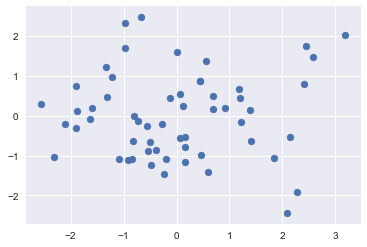

In [226]:
plt.scatter(x_pca_tsform[:,0],x_pca_tsform[:,1]) 

In [220]:
x_pca_tsform

array([[  1.41084735e+00,  -6.26637766e-01],
       [ -1.88664649e+00,   1.20930734e-01],
       [ -5.41215573e-01,  -8.85084008e-01],
       [  1.38172366e+00,   1.54822510e-01],
       [  1.50961874e-01,  -7.92799748e-01],
       [  4.43444677e-01,   8.68987625e-01],
       [ -1.60432514e+00,   2.03636132e-01],
       [ -1.32940835e+00,   1.23255533e+00],
       [ -1.32449181e-01,   4.38034383e-01],
       [  1.83322890e+00,  -1.05891726e+00],
       [  1.20769837e+00,   4.46235063e-01],
       [ -8.19124570e-01,  -6.45187248e-01],
       [  2.41133861e+00,   7.98464006e-01],
       [ -1.08290717e+00,  -1.09025047e+00],
       [  6.55585794e-02,  -5.60317724e-01],
       [ -9.79872940e-01,   1.68888716e+00],
       [  1.58927127e-01,  -5.40590226e-01],
       [ -2.54988024e+00,   2.99115991e-01],
       [ -4.90292241e-01,  -1.24546703e+00],
       [ -2.30403908e-01,  -1.46278255e+00],
       [ -1.30735407e+00,   4.64034449e-01],
       [  6.84133990e-01,   1.67925696e-01],
       [  

In [224]:
x_pca_tsform[:,0]

array([  1.41084735e+00,  -1.88664649e+00,  -5.41215573e-01,
         1.38172366e+00,   1.50961874e-01,   4.43444677e-01,
        -1.60432514e+00,  -1.32940835e+00,  -1.32449181e-01,
         1.83322890e+00,   1.20769837e+00,  -8.19124570e-01,
         2.41133861e+00,  -1.08290717e+00,   6.55585794e-02,
        -9.79872940e-01,   1.58927127e-01,  -2.54988024e+00,
        -4.90292241e-01,  -2.30403908e-01,  -1.30735407e+00,
         6.84133990e-01,   6.00972158e-01,  -9.67832762e-01,
         3.17599778e+00,  -9.17352607e-01,  -6.73911112e-01,
         2.28027716e+00,   7.33243033e-02,  -7.27195509e-01,
         1.53780348e-01,  -3.83127869e-01,  -1.97752566e-01,
         9.22373895e-01,   1.17875830e+00,  -5.59128552e-01,
         2.15126746e+00,   6.94437292e-01,   7.03411107e-04,
         4.62666268e-01,  -2.76647337e-01,  -1.88981013e+00,
         1.21672607e+00,  -1.21078024e+00,  -7.96559202e-01,
        -1.63940654e+00,   2.43564290e+00,  -5.04317431e-01,
        -2.10939829e+00,

In [230]:
pca.components_

array([[  1.84705309e-01,   3.74098917e-01,   4.28860328e-01,
          1.70958840e-01,  -9.32818762e-02,   4.42054035e-02,
          2.72012180e-02,   6.89199958e-02,   0.00000000e+00,
         -2.23157172e-02,   1.22979514e-02,  -2.47325530e-01,
          2.13670954e-02,   1.05879118e-22,  -2.62621677e-02,
          0.00000000e+00,   1.58956531e-02,   5.00746605e-02,
         -1.31668654e-02,   3.49575244e-02,  -3.16352726e-01,
          8.81421191e-03,   6.71331201e-02,   2.52783548e-02,
          0.00000000e+00,  -1.50488056e-02,   5.16816983e-03,
         -5.81986180e-02,  -2.80731762e-03,   0.00000000e+00,
          7.41654850e-02,   4.57591523e-02,  -7.63498919e-02,
          3.03621173e-01,  -2.50291700e-02,   3.64301251e-02,
         -2.91983704e-02,  -4.73841500e-02,  -8.91749288e-02,
          8.89491796e-02,   2.24025265e-02,  -1.30708543e-01,
          2.81484501e-01,  -8.67817088e-02,   1.23643580e-02,
         -4.17717740e-01,   1.22684243e-01,   0.00000000e+00],
       

In [232]:
pca_df=pd.DataFrame(pca.components_, columns=x_train_new.columns, index=['PCA-1', 'PCA-2']).T

In [233]:
pca_df

,PCA-1,PCA-2
Year,1.847053e-01,3.594504e-01
unemployment_rate,3.740989e-01,-3.607748e-01
HI_ratio,4.288603e-01,5.077811e-01
"County[T.Baltimore city, MD]",1.709588e-01,1.748434e-02
"County[T.Bexar County, TX]",-9.328188e-02,8.399313e-02
"County[T.Bronx County, NY]",4.420540e-02,-1.008547e-01
"County[T.Broward County, FL]",2.720122e-02,-2.219812e-02
"County[T.Caddo Parish, LA]",6.892000e-02,1.206151e-02
"County[T.Clark County, NV]",0.000000e+00,-0.000000e+00
"County[T.Cook County, IL]",-2.231572e-02,-1.173169e-01


In [236]:
pca_df['PCA-1'].reindex(pca_df['PCA-1'].abs().sort_values(inplace=False, ascending=False).index)

HI_ratio                                 4.288603e-01
Race[T.White]                           -4.177177e-01
unemployment_rate                        3.740989e-01
County[T.Harris County, TX]             -3.163527e-01
County[T.Philadelphia County, PA]        3.036212e-01
County[T.Wayne County, MI]               2.814845e-01
County[T.Dallas County, TX]             -2.473255e-01
Year                                     1.847053e-01
County[T.Baltimore city, MD]             1.709588e-01
County[T.Tarrant County, TX]            -1.307085e-01
Gender[T.Male]                           1.226842e-01
County[T.Bexar County, TX]              -9.328188e-02
County[T.San Diego County, CA]          -8.917493e-02
County[T.Shelby County, TN]              8.894918e-02
County[T.Will County, IL]               -8.678171e-02
County[T.Oklahoma County, OK]           -7.634989e-02
County[T.Milwaukee County, WI]           7.416549e-02
County[T.Caddo Parish, LA]               6.892000e-02
County[T.Jefferson County, A

In [237]:
pca_df['PCA-2'].reindex(pca_df['PCA-2'].abs().sort_values(inplace=False, ascending=False).index)

HI_ratio                                 5.077811e-01
unemployment_rate                       -3.607748e-01
Year                                     3.594504e-01
County[T.Maricopa County, AZ]            3.416179e-01
Race[T.White]                            2.718262e-01
County[T.Wayne County, MI]              -2.088181e-01
County[T.Queens County, NY]              1.838902e-01
County[T.Hillsborough County, FL]        1.556905e-01
County[T.Worcester County, MA]           1.520468e-01
County[T.Philadelphia County, PA]        1.447702e-01
County[T.Shelby County, TN]             -1.268386e-01
County[T.Marion County, IN]             -1.177451e-01
County[T.Cook County, IL]               -1.173169e-01
County[T.Kings County, NY]              -1.035640e-01
County[T.Bronx County, NY]              -1.008547e-01
Gender[T.Male]                          -9.632371e-02
County[T.Dallas County, TX]             -9.085780e-02
County[T.District of Columbia, DC]      -8.482852e-02
County[T.Bexar County, TX]  